In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
unrate = pd.read_csv('dataset/UNRATE.csv')

In [8]:
np.random.seed(1)

index_nans = np.random.choice(len(unrate), size=int(len(unrate) * 0.2), replace=False)

unrate['UNRATE_NA_RAND'] = unrate['UNRATE'].copy()
unrate.loc[index_nans, 'UNRATE_NA_RAND'] = np.nan

<Axes: xlabel='DATE'>

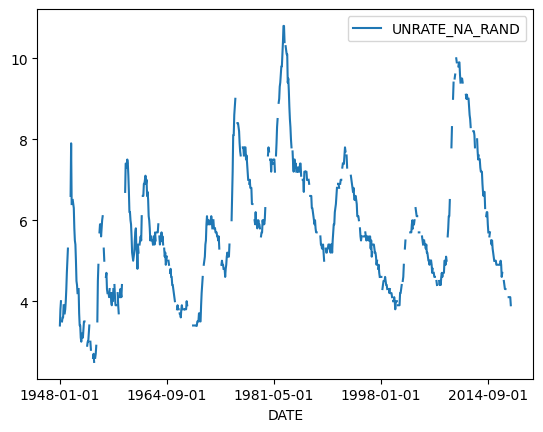

In [9]:
unrate.plot(x='DATE', y='UNRATE_NA_RAND')

### Forward fill

In [20]:
# forward fill impuntation
unrate['UNRATE_NA_FF'] = unrate['UNRATE_NA_RAND'].ffill()
unrate['boolean_na']  = unrate['UNRATE_NA_FF'].isna()
index_nans = unrate[unrate['boolean_na'] == True].index

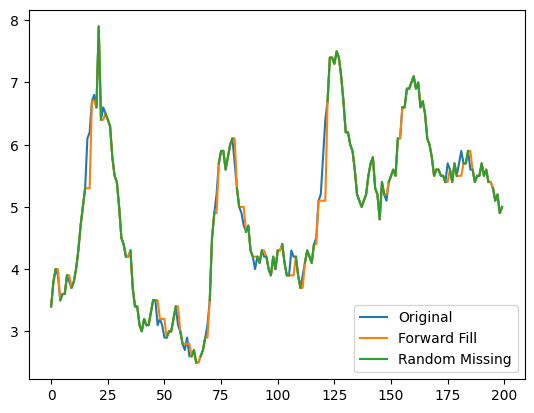

In [29]:
plt.plot(unrate['UNRATE'][0:200], label='Original')
plt.plot(unrate['UNRATE_NA_FF'][0:200], label='Forward Fill')
plt.plot(unrate['UNRATE_NA_RAND'][0:200], label='Random Missing')
plt.legend()
plt.show()

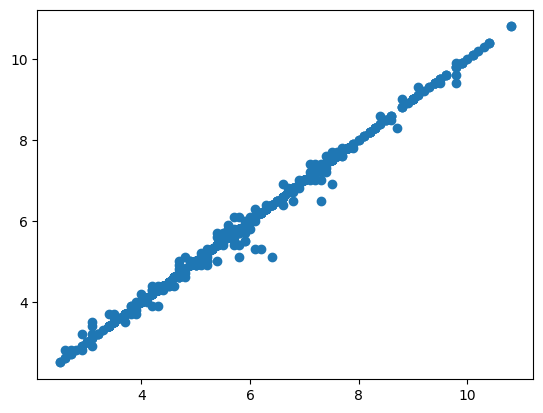

In [32]:
plt.scatter(unrate['UNRATE'], unrate['UNRATE_NA_FF'])